In [36]:
import pandas as pd
import numpy as np
import os

from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score 
from sklearn.metrics import precision_recall_fscore_support, classification_report

import matplotlib.pyplot as plt
%matplotlib inline

import functools

import h5py

### Environmental vars

In [37]:
P_THRESHOLD=0.5

In [38]:
DATADIR = os.getenv('DATADIR')

In [39]:
print("model v2.0.0 was run on data dated {}".format(DATADIR))

model v2.0.0 was run on data dated /data/2018-03-05


In [55]:
labelled_level2 = pd.read_csv(
    os.path.join(DATADIR, 'labelled_level2.csv.gz'),
    dtype=object,
    compression='gzip'
)# Create World taxon in case any items not identified 
# through doc type in clean_content are still present
labelled_level2.loc[labelled_level2['level1taxon'] == 'World', 'level2taxon'] = 'world_level1'

# creating categorical variable for level2taxons from values
labelled_level2['level2taxon'] = labelled_level2['level2taxon'].astype('category')

# Add 1 because of zero-indexing to get 1-number of level2taxons as numerical targets
labelled_level2['level2taxon_code'] = labelled_level2.level2taxon.astype('category').cat.codes + 1

# create dictionary of taxon category code to string label for use in model evaluation
labels_index = dict(zip((labelled_level2['level2taxon_code']),
                        labelled_level2['level2taxon']))

In [40]:
new_pred = pd.read_csv(
    os.path.join(DATADIR, 'new_predictions_1010_0803_.csv.gz'),
    dtype=object,
    compression='gzip'
)

In [41]:
new_content = pd.read_csv(
    os.path.join(DATADIR, 'new_content.csv.gz'),
    dtype=object,
    compression='gzip'
)

In [42]:
new.shape

(87726, 219)

In [43]:
new_arrays = np.load(os.path.join(DATADIR, 'predict_arrays.npz'))

In [44]:
new_arrays.files

['x', 'meta', 'title', 'desc', 'content_id']

In [45]:
new_arrays['content_id'].shape

(87726,)

In [49]:
if new_arrays['content_id'].shape[0] == new_pred.shape[0]:
    new_pred['content_id'] = new_arrays['content_id']
else:
    print("warning: true_train and content_id may not originate from same data")
    
    

In [64]:
newprob_by_id = pd.melt(new_pred, 
                        id_vars=['content_id'], var_name='taxon2', value_name='prob')

In [65]:
newprob_by_id.shape

(19124268, 3)

### filter by prob

In [66]:
newprob_by_id['prob'] = pd.to_numeric(newprob_by_id['prob'])
newprob_by_id['taxon2'] = pd.to_numeric(newprob_by_id['taxon2'])

(86966, 3)

In [68]:
newprob_by_id['taxon2label'] = newprob_by_id['taxon2'].map(labels_index)

In [69]:
predictions = newprob_by_id[newprob_by_id['prob'] > 0.5]

In [70]:
predictions_meta = pd.merge(
    left=predictions,
    right=new_content,
    on='content_id',
    how='left',
    indicator=True, 
    validate='m:m'
)

In [101]:
predictions_meta[['prob', 'taxon2label', 'title', 'description']][100:150]


,prob,taxon2label,title,description
100,0.690139,"Adoption, fostering and surrogacy",new adoption inspection arrangements published,for an authority to be outstanding delays in a...
101,0.999993,"Adoption, fostering and surrogacy",foster carers' charter: putting it into practice,this document includes advice on how to put th...
102,0.999716,"Adoption, fostering and surrogacy",adoption: access to information and intermedia...,guidance for practitioners working with adopte...
103,0.999710,"Adoption, fostering and surrogacy",tsd standards for foster carers: guide for sup...,information for support care providers on usin...
104,0.999997,"Adoption, fostering and surrogacy",foster carers' charter,this charter sets out shared principles for fo...
105,0.996969,"Adoption, fostering and surrogacy",adoption leadership board quarterly data repor...,agency-level reports on adoption system perfor...
106,0.999983,"Adoption, fostering and surrogacy",notifications of private fostering arrangement...,the number of notifications of private fosteri...
107,0.999657,"Adoption, fostering and surrogacy",cornerstone adoption support programme: evalua...,report on the effects of the programme on chil...
108,0.999923,"Adoption, fostering and surrogacy",adoption support fund: evaluation,results of an independent 2-year evaluation of...
109,0.999974,"Adoption, fostering and surrogacy",inter-agency adoption: subsidy of the inter-ag...,study into the inter-agency fee and the adopti...


In [72]:
predictions_meta.to_csv(os.path.join(DATADIR, 'predictions_meta.csv.gz'),compression='gzip',index=False)

### How much content tagged to at least one taxon (>0.5 prob)?

In [93]:
predictions_meta.content_id.nunique()

62780

In [107]:
now_tagged = predictions_meta['content_id'].unique().astype(str)

In [108]:
all_content = newprob_by_id['content_id'].astype(str)

In [123]:
no_predictions = np.setdiff1d(all_content, now_tagged)

In [124]:
no_predictions = pd.DataFrame(no_predictions)

In [126]:
no_predictions.columns = ['content_id']

In [127]:
no_predictions.head()

,content_id
0,000b7e2a-db11-49ce-8320-9d7219babe51
1,001064f0-cb34-4eeb-9d25-21cda51a7e8f
2,00119f7b-f88f-4494-8a42-dc0a95f5e075
3,0012a263-e552-4240-b0af-29730e8c1e03
4,0014a45d-7f07-4256-923e-177bf408e4f5


In [128]:


no_predictions_meta = predictions_meta = pd.merge(
    left=no_predictions,
    right=new_content,
    on='content_id',
    how='left',
    indicator=True, 
    validate='m:m'
)

In [129]:
no_predictions_meta

,content_id,base_path,body,combined_text,content_purpose_document_supertype,content_purpose_subgroup,content_purpose_supergroup,description,details,document_type,...,public_updated_at,publishing_app,search_user_need_document_supertype,taxon_id,taxons,title,untagged_type,updated_at,user_journey_document_supertype,_merge
0,000b7e2a-db11-49ce-8320-9d7219babe51,/government/publications/memorandum-of-underst...,this memorandum of understanding (mou) sets ou...,memorandum of understanding: charity commissio...,guidance,NaN,NaN,an agreement of the relationship between the c...,"{'body': '<div class=""govspeak""><p>This memora...",policy_paper,...,2010-05-31T23:00:00.000+00:00,whitehall,government,NaN,NaN,memorandum of understanding: charity commissio...,untagged,2018-02-07 12:10:38.298,thing,both
1,001064f0-cb34-4eeb-9d25-21cda51a7e8f,/government/news/boris-johnsons-diwali-message,foreign secretary boris johnson said: i wish a...,boris johnson’s diwali message foreign secreta...,news,news,news_and_communications,foreign secretary boris johnson sends his best...,"{'body': '<div class=""govspeak""><p>Foreign Sec...",press_release,...,2016-10-28T16:30:00.000+00:00,whitehall,government,NaN,NaN,boris johnson’s diwali message,untagged,2018-03-02 15:20:23.183,thing,both
2,00119f7b-f88f-4494-8a42-dc0a95f5e075,/government/news/priority-service-expanded-to-...,those who choose this optional service will ha...,priority service expanded to tier 4 applicants...,news,NaN,NaN,the uk has today (13 january) announced that t...,"{'body': '<div class=""govspeak""><p>Those who c...",world_news_story,...,2015-01-13T08:04:00.000+00:00,whitehall,government,NaN,NaN,priority service expanded to tier 4 applicants...,untagged,2018-02-23 15:00:35.789,thing,both
3,0012a263-e552-4240-b0af-29730e8c1e03,/government/publications/staffing-and-employme...,NaN,staffing and employment: advice for schools gu...,NaN,NaN,NaN,guidance for managing staff and employment iss...,NaN,guidance,...,NaN,whitehall,NaN,aafa1481-ad43-4f47-8eb2-ec6dc693ee3e,NaN,staffing and employment: advice for schools,old_taxons,NaN,NaN,both
4,0014a45d-7f07-4256-923e-177bf408e4f5,/government/publications/zero-response-to-an-f...,the zero response to an foi requesting details...,zero response to an foi requesting details of ...,NaN,NaN,NaN,the zero response to an foi requesting details...,"{'body': '<div class=""govspeak""><p>The zero re...",foi_release,...,2017-07-31T15:40:25.000+00:00,whitehall,NaN,NaN,NaN,zero response to an foi requesting details of ...,untagged,2017-07-31 15:40:26.292,thing,both
5,00193e41-4548-40b4-b503-208a0b718220,/sex-shop-and-cinema-licence,contact your council for a licence if you want...,sex shop and cinema licence (england and wales...,transactions,NaN,NaN,contact your council for a sex establishment l...,"{'external_related_links': [], 'licence_identi...",licence,...,2012-09-17T14:54:47.000+00:00,publisher,government,NaN,NaN,sex shop and cinema licence (england and wales),untagged,2018-01-29 11:14:24.685,thing,both
6,001a8682-22fd-4e17-8f93-419e0a10dfb2,/government/news/expansion-of-us-global-entry-...,sir charles montgomery director general of bor...,expansion of us global entry service to britis...,news,NaN,NaN,global entry which provides expedited clearanc...,"{'body': '<div class=""govspeak""><p>Sir Charles...",news_story,...,2015-11-04T16:30:11.000+00:00,whitehall,government,NaN,NaN,expansion of us global entry service to britis...,untagged,2018-01-18 17:09:25.413,thing,both
7,002011d3-8ebc-49ff-b11b-76b1fcd6306d,/government/news/environment-agency-angling-fo...,the environment agency is looking for an organ...,environment agency angling for a long-term par...,NaN,NaN,NaN,the environment agency is looking for an organ...,"{'body': '<div class=""govspeak""><p>The Environ...",news_story,...,2015-02-10T12:24:38.000+00:00,whitehall,NaN,NaN,NaN,environment agency angling for a long-term par...,untagged,2017-10-05 08:43:40.638,thing,both
8,00240c47-1571-40f1-b8d9-2d33521

### Load in data

In [ ]:
true_train = pd.read_csv(os.path.join(DATADIR, 'true_train_1404_0703_.csv.gz'), dtype=float, compression='gzip')
pred_train = pd.read_csv(os.path.join(DATADIR, 'train_results_1404_0703_.csv.gz'), dtype=float, compression='gzip')

In [ ]:
true_dev = pd.read_csv(os.path.join(DATADIR, 'true_dev_1149_0603_.csv.gz'), dtype=float, compression='gzip')
prob_dev = pd.read_csv(os.path.join(DATADIR, 'dev_results_1149_0603_.csv.gz'), dtype=float, compression='gzip')

In [ ]:
train = np.load(os.path.join(DATADIR, 'train_arrays.npz'))

In [ ]:
dev = np.load(os.path.join(DATADIR, 'dev_arrays.npz'))

In [ ]:
train.files

In [ ]:
train['content_id']

In [ ]:
train['content_id'].shape

In [ ]:
true_train.shape[0]

### Evaluate model

#### Training metrics

In [ ]:
y_pred = pred_train.copy()

In [ ]:
y_pred[y_pred>=P_THRESHOLD] = 1
y_pred[y_pred<P_THRESHOLD] = 0

In [ ]:
print('micro: {}'.format(precision_recall_fscore_support(true_train, y_pred, average='micro', sample_weight=None)))
print('macro: {}'.format(precision_recall_fscore_support(true_train, y_pred, average='macro', sample_weight=None)))
print('weightedmacro: {}'.format(precision_recall_fscore_support(true_train, y_pred, average='weighted', sample_weight=None)))

In [ ]:
eval_metrics = precision_recall_fscore_support(true_train, y_pred, average=None, sample_weight=None)
eval_metrics_df = pd.DataFrame(list(eval_metrics))

In [ ]:
train_metrics = eval_metrics_df.transpose()
train_metrics.columns = ['precision', 'recall', 'f1', 'support']
train_metrics['level2code'] = train_metrics.index +1
train_metrics['level2label'] = train_metrics['level2code'].map(labels_index)

#### Development set metrics

In [ ]:
pred_dev = prob_dev.copy()

In [ ]:
pred_dev[pred_dev>=P_THRESHOLD] = 1
pred_dev[pred_dev<P_THRESHOLD] = 0

In [ ]:
print('micro: {}'.format(precision_recall_fscore_support(true_dev, pred_dev, average='micro', sample_weight=None)))
print('macro: {}'.format(precision_recall_fscore_support(true_dev, pred_dev, average='macro', sample_weight=None)))
print('weightedmacro: {}'.format(precision_recall_fscore_support(true_dev, pred_dev, average='weighted', sample_weight=None)))

In [ ]:
eval_metrics = precision_recall_fscore_support(true_dev, pred_dev, average=None, sample_weight=None)
eval_metrics_df = pd.DataFrame(list(eval_metrics))

In [ ]:
dev_metrics = eval_metrics_df.transpose()
dev_metrics.columns = ['precision', 'recall', 'f1', 'support']
dev_metrics['taxon2code'] = dev_metrics.index +1
dev_metrics['taxon2label'] = dev_metrics['taxon2code'].map(labels_index)

In [68]:
dev_metrics[dev_metrics['f1']==0].shape[0]

24

In [69]:
dev_metrics[dev_metrics['f1']==1].shape[0]

68

In [70]:
dev_metrics[dev_metrics['f1']==1]

,precision,recall,f1,support,taxon2code,taxon2label
4,1.0,1.0,1.0,48.0,5,Armed forces
8,1.0,1.0,1.0,1.0,9,Assessing environmental impact
10,1.0,1.0,1.0,3.0,11,Attorney General guidance to the legal profession
13,1.0,1.0,1.0,1.0,14,Benefits for families
17,1.0,1.0,1.0,1.0,18,Bringing personal belongings to the UK
24,1.0,1.0,1.0,3.0,25,Careers in transport
26,1.0,1.0,1.0,3.0,27,Carers' health
27,1.0,1.0,1.0,1.0,28,"Certificates, register offices, changes of nam..."
28,1.0,1.0,1.0,3.0,29,"Charities, volunteering and honours"
44,1.0,1.0,1.0,2.0,45,"Court claims, debt and bankruptcy"


In [71]:
high = dev_metrics[dev_metrics['f1']>0.9]

In [72]:
morethan80 = dev_metrics[dev_metrics['f1']>0.8]

In [73]:
dev_metrics[dev_metrics['f1']<0.6].shape[0]

31

## support and performance

The support is the number of occurrences of each class in y_true

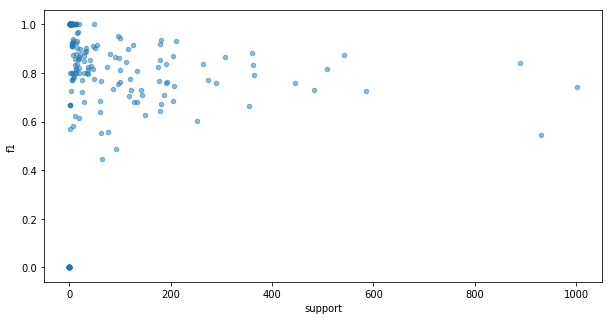

In [110]:
dev_metrics.plot.scatter(x='support', y='f1', marker='o', alpha=.5, figsize=(10, 5))


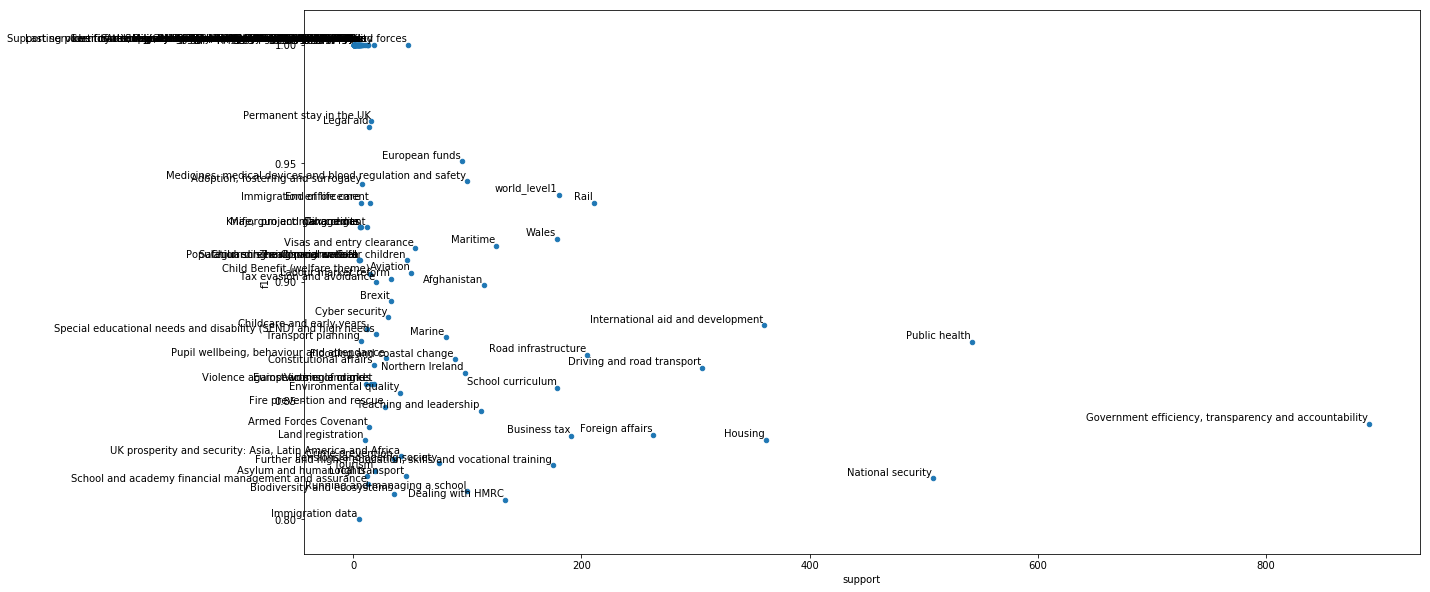

In [75]:
morethan80.plot.scatter(x='support', y='f1', figsize=(20, 10))

for label, x, y in zip(morethan80['taxon2label'], morethan80['support'], morethan80['f1']):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-1, 1),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

### look at content predicted in taxons with f1=1

In [76]:
prob_dev.head()

,1,2,3,4,5,6,7,8,9,10,...,209,210,211,212,213,214,215,216,217,218
0,1.165881e-14,1.807397e-13,3.451293e-14,6.287820e-17,1.668254e-19,2.073975e-12,7.396179e-18,5.113691e-08,2.129879e-15,9.067941e-17,...,1.271009e-15,3.133356e-12,1.538252e-08,4.587988e-11,2.258334e-14,3.153224e-16,8.787685e-15,3.988735e-19,2.770739e-10,2.139895e-07
1,1.514083e-07,3.331143e-08,1.139475e-11,2.844467e-08,2.094252e-08,3.088199e-06,6.567718e-07,1.071657e-02,2.880979e-07,8.789715e-07,...,2.063507e-07,4.653625e-09,9.266956e-07,2.628897e-04,3.868810e-08,2.864378e-11,7.613178e-11,9.788504e-10,7.304470e-09,1.223808e-06
2,7.031448e-17,8.579963e-22,3.245885e-36,5.242608e-36,8.642692e-25,3.796147e-33,4.248200e-37,3.241169e-30,4.862877e-16,1.922038e-21,...,6.359810e-30,2.174244e-35,5.060508e-24,1.272333e-23,2.863876e-18,8.664010e-19,7.967176e-20,4.724785e-15,1.464422e-25,5.487067e-20
3,3.387666e-10,4.323407e-09,4.398544e-15,7.354882e-13,1.606409e-06,9.283779e-13,4.268500e-17,1.847909e-04,6.933860e-11,4.047880e-11,...,1.732335e-05,1.096070e-17,1.601181e-11,1.159819e-05,2.574492e-07,6.070632e-08,2.169033e-09,3.267043e-08,3.601657e-13,2.845138e-13
4,4.072112e-03,4.451071e-08,1.950250e-04,1.586458e-06,6.852108e-07,3.679448e-05,4.754758e-06,1.948295e-04,9.512553e-07,8.772676e-06,...,4.271441e-06,3.044638e-04,6.170463e-04,3.163516e-04,9.538026e-07,2.310041e-06,4.361569e-06,1.350610e-04,1.061749e-06,1.087103e-05


In [77]:
dev_metrics[dev_metrics['f1']==1].head()

,precision,recall,f1,support,taxon2code,taxon2label
4,1.0,1.0,1.0,48.0,5,Armed forces
8,1.0,1.0,1.0,1.0,9,Assessing environmental impact
10,1.0,1.0,1.0,3.0,11,Attorney General guidance to the legal profession
13,1.0,1.0,1.0,1.0,14,Benefits for families
17,1.0,1.0,1.0,1.0,18,Bringing personal belongings to the UK


In [78]:
perfect_performance = dev_metrics[dev_metrics['f1']==1].taxon2code.unique()
perfect_performance = perfect_performance.astype(str)

In [79]:
keep_perfect_performing_taxons = prob_dev[perfect_performance].copy()

In [80]:
keep_perfect_performing_taxons.shape

(10377, 68)

In [81]:
if dev['content_id'].shape[0] == keep_perfect_performing_taxons.shape[0]:
    keep_perfect_performing_taxons['content_id'] = dev['content_id']
else:
    print("warning: true_train and content_id may not originate from same data")

In [82]:
keep_perfect_performing_taxons.head()

,5,9,11,14,18,25,27,28,29,45,...,191,194,196,197,199,201,214,215,217,content_id
0,1.668254e-19,2.129879e-15,8.418954e-15,3.293599e-14,3.239779e-14,6.680569e-17,3.710611e-13,6.194689e-15,5.778313e-16,2.690364e-17,...,3.150220e-15,2.288571e-20,1.319374e-22,2.223906e-18,5.620565e-16,9.086407e-11,3.153224e-16,8.787685e-15,2.770739e-10,5fa7c2b0-7631-11e4-a3cb-005056011aef
1,2.094252e-08,2.880979e-07,3.026150e-07,2.123490e-08,1.373404e-07,1.384123e-05,3.446244e-09,2.184257e-07,5.009768e-06,1.398183e-06,...,4.383364e-07,8.015632e-06,1.855992e-08,8.488502e-10,5.615145e-08,4.604862e-08,2.864378e-11,7.613178e-11,7.304470e-09,f06014da-89dd-4543-b122-7ad51cfc3c50
2,8.642692e-25,4.862877e-16,1.002297e-27,6.527416e-22,1.915772e-28,1.788164e-28,7.160400e-32,4.935302e-20,3.779466e-14,7.663100e-27,...,7.023895e-30,8.602508e-30,4.827196e-35,3.005965e-20,1.565638e-34,8.098269e-18,8.664010e-19,7.967176e-20,1.464422e-25,b6b45948-ff2f-416d-a90a-80870e02ca6a
3,1.606409e-06,6.933860e-11,5.390022e-11,2.403999e-09,1.742370e-12,2.899255e-14,2.799545e-15,4.731656e-08,1.767865e-03,2.004690e-09,...,3.251877e-10,1.392769e-13,1.786081e-17,4.473626e-08,1.327482e-13,2.737062e-08,6.070632e-08,2.169033e-09,3.601657e-13,a302e3f9-1169-48c6-9cab-94c9f326eca4
4,6.852108e-07,9.512553e-07,1.906079e-05,1.242004e-07,6.762887e-05,3.122817e-05,3.254249e-06,6.349587e-06,7.511213e-07,1.342090e-06,...,2.210734e-05,7.027055e-07,1.378359e-04,1.112837e-06,1.957510e-04,1.406502e-05,2.310041e-06,4.361569e-06,1.061749e-06,3161b773-2bd1-4cbd-9d06-a55562164c32


In [83]:
# armed forces

keep_perfect_performing_taxons[keep_perfect_performing_taxons['5'] > 0.5].shape

(48, 69)

In [84]:
perfect_by_id = pd.melt(keep_perfect_performing_taxons, 
                        id_vars=['content_id'], var_name='taxon2', value_name='prob')

In [85]:
perfect_by_id.shape

(705636, 3)

In [86]:
positive_perfect = perfect_by_id[perfect_by_id['prob']>0.5].copy()

In [87]:
positive_perfect.shape

(309, 3)

In [88]:
positive_perfect_meta = pd.merge(
    left=positive_perfect,
    right=labelled_level2,
    on='content_id',
    how='left',
    indicator=True, 
    validate='m:m'
)

In [89]:
positive_perfect_meta['taxon2label'] = pd.to_numeric(positive_perfect_meta['taxon2']).map(labels_index)

In [90]:
positive_perfect_meta

,content_id,taxon2,prob,base_path,content_purpose_document_supertype,content_purpose_subgroup,content_purpose_supergroup,description,details,document_type,...,taxon_base_path,taxon_name,level1taxon,level2taxon,level3taxon,level4taxon,level5taxon,level2taxon_code,_merge,taxon2label
0,5c9c8a62-7631-11e4-a3cb-005056011aef,5,1.000000,/government/fatalities/drummer-thomas-wright-k...,updates-and-alerts,NaN,NaN,it is with deep sadness that the ministry of d...,{'emphasised_organisations': ['d994e55c-48c9-4...,fatality_notice,...,/defence/working-armed-forces,Armed forces,Defence,Armed forces,NaN,NaN,NaN,5,both,Armed forces
1,5c9c09e4-7631-11e4-a3cb-005056011aef,5,1.000000,/government/fatalities/sergeant-stuart-millar-...,updates-and-alerts,NaN,NaN,it is with sadness that the ministry of defenc...,{'emphasised_organisations': ['d994e55c-48c9-4...,fatality_notice,...,/defence/working-armed-forces,Armed forces,Defence,Armed forces,NaN,NaN,NaN,5,both,Armed forces
2,5c9cf0ab-7631-11e4-a3cb-005056011aef,5,1.000000,/government/fatalities/corporal-harvey-holmes-...,updates-and-alerts,NaN,NaN,it is with sadness the ministry of defence mus...,{'emphasised_organisations': ['d994e55c-48c9-4...,fatality_notice,...,/defence/working-armed-forces,Armed forces,Defence,Armed forces,NaN,NaN,NaN,5,both,Armed forces
3,5c9ce826-7631-11e4-a3cb-005056011aef,5,1.000000,/government/fatalities/sapper-guy-mellors-kill...,updates-and-alerts,NaN,NaN,it is with deep regret that the ministry of de...,{'emphasised_organisations': ['d994e55c-48c9-4...,fatality_notice,...,/defence/working-armed-forces,Armed forces,Defence,Armed forces,NaN,NaN,NaN,5,both,Armed forces
4,5d05a253-7631-11e4-a3cb-005056011aef,5,1.000000,/government/fatalities/corporal-alex-guy-kille...,updates-and-alerts,NaN,NaN,it is with sadness that the ministry of defenc...,{'emphasised_organisations': ['d994e55c-48c9-4...,fatality_notice,...,/defence/working-armed-forces,Armed forces,Defence,Armed forces,NaN,NaN,NaN,5,both,Armed forces
5,5c9cfbc6-7631-11e4-a3cb-005056011aef,5,1.000000,/government/fatalities/bombardier-samuel-josep...,updates-and-alerts,NaN,NaN,it is with sadness that the ministry of defenc...,{'emphasised_organisations': ['d994e55c-48c9-4...,fatality_notice,...,/defence/working-armed-forces,Armed forces,Defence,Armed forces,NaN,NaN,NaN,5,both,Armed forces
6,5c9c58c0-7631-11e4-a3cb-005056011aef,5,1.000000,/government/fatalities/warrant-officer-class-2...,updates-and-alerts,NaN,NaN,it is with deep regret that the ministry of de...,{'emphasised_organisations': ['d994e55c-48c9-4...,fatality_notice,...,/defence/working-armed-forces,Armed forces,Defence,Armed forces,NaN,NaN,NaN,5,both,Armed forces
7,5c9ce77c-7631-11e4-a3cb-005056011aef,5,1.000000,/government/fatalities/lance-sergeant-david-gr...,updates-and-alerts,NaN,NaN,it is with sadness that the ministry of defenc...,{'emphasised_organisations': ['d994e55c-48c9-4...,fatality_notice,...,/defence/working-armed-forces,Armed forces,Defence,Armed forces,NaN,NaN,NaN,5,both,Armed forces
8,5c9cb698-7631-11e4-a3cb-005056011aef,5,0.999887,/government/fatalities/death-of-a-british-serv...,updates-and-alerts,NaN,NaN,it is with profound regret that the ministry o...,{'emphasised_organisations': ['d994e55c-48c9-4...,fatality_notice,...,/defence/working-armed-forces,Armed forces,Defence,Armed forces,NaN,NaN,NaN,5,both,Armed forces
9,5c9c1042-7631-11e4-a3cb-005056011aef,5,1.000000,/government/fatalities/captain-mark-hale-lance...,updates-and-alerts,NaN,NaN,with deep regret the ministry of defence must ...,{'emphasised_organisations': ['d994e55c-48c9-4...,fatality_notice,...,/defence/working-armed-forces,Armed forces,Defence,Armed forces,NaN,NaN,NaN,5,both,Armed forces


In [91]:
print("{}% of content has been tagged to taxons which have perfect performance".format(
    positive_perfect.content_id.nunique()/keep_perfect_performing_taxons.shape[0]*100)
)

2.679001638238412% of content has been tagged to taxons which have perfect performance


quick browse but this looks good

###  80 < taxon F1 <1 = good performance!

In [92]:
good_performance = dev_metrics[(dev_metrics['f1']<1) & (dev_metrics['f1']>0.8)].taxon2code.unique().astype(str)

In [93]:
keep_good_performing_taxons = prob_dev[good_performance].copy()

In [94]:
keep_good_performing_taxons.shape

(10377, 66)

In [95]:
if dev['content_id'].shape[0] == keep_good_performing_taxons.shape[0]:
    keep_good_performing_taxons['content_id'] = dev['content_id']
else:
    print("warning: true_train and content_id may not originate from same data")

In [96]:
good_by_id = pd.melt(keep_good_performing_taxons, 
                        id_vars=['content_id'], var_name='taxon2', value_name='prob')

In [97]:
good_by_id.shape

(684882, 3)

In [98]:
positive_good = good_by_id[good_by_id['prob']>0.5].copy()

In [99]:
positive_good.shape

(6580, 3)

In [100]:
positive_good.content_id.nunique()

5708

In [101]:
print("{}% of content has been tagged to taxons which have good performance".format(
    positive_good.content_id.nunique()/keep_good_performing_taxons.shape[0]*100)
)

55.00626385275128% of content has been tagged to taxons which have good performance


In [102]:
positive_good_meta = pd.merge(
    left=positive_good,
    right=labelled_level2,
    on='content_id',
    how='left',
    indicator=True, 
    validate='m:m'
)

In [103]:
positive_good_meta['taxon2label'] = pd.to_numeric(positive_good_meta['taxon2']).map(labels_index)

In [104]:
positive_good_meta

,content_id,taxon2,prob,base_path,content_purpose_document_supertype,content_purpose_subgroup,content_purpose_supergroup,description,details,document_type,...,taxon_base_path,taxon_name,level1taxon,level2taxon,level3taxon,level4taxon,level5taxon,level2taxon_code,_merge,taxon2label
0,5e134ab5-7631-11e4-a3cb-005056011aef,2,0.999525,/government/publications/setting-the-standards...,guidance,NaN,NaN,information for support care providers on usin...,{'emphasised_organisations': ['ebd15ade-73b2-4...,guidance,...,/childcare-parenting/fostering,Fostering,"Parenting, childcare and children's services","Adoption, fostering and surrogacy",Fostering,NaN,NaN,2,both,"Adoption, fostering and surrogacy"
1,5f1a3552-7631-11e4-a3cb-005056011aef,2,0.999996,/guidance/intercountry-adoption-information-fo...,guidance,NaN,NaN,how adoption agencies should handle applicatio...,{'emphasised_organisations': ['ebd15ade-73b2-4...,detailed_guide,...,/childcare-parenting/intercountry-adoption,Intercountry adoption,"Parenting, childcare and children's services","Adoption, fostering and surrogacy",Intercountry adoption,NaN,NaN,2,both,"Adoption, fostering and surrogacy"
2,b4c11481-7261-4e80-80e4-d612f18ee46a,2,0.999798,/government/publications/introduction-to-indep...,guidance,NaN,NaN,what you need to know about registering with o...,{'emphasised_organisations': ['ad5f6169-ac7b-4...,guidance,...,/health-and-social-care/social-care,Social care,Health and social care,Social care,NaN,NaN,NaN,176,both,"Adoption, fostering and surrogacy"
3,b4c11481-7261-4e80-80e4-d612f18ee46a,2,0.999798,/government/publications/introduction-to-indep...,guidance,NaN,NaN,what you need to know about registering with o...,{'emphasised_organisations': ['ad5f6169-ac7b-4...,guidance,...,/childcare-parenting/fostering,Fostering,"Parenting, childcare and children's services","Adoption, fostering and surrogacy",Fostering,NaN,NaN,2,both,"Adoption, fostering and surrogacy"
4,b4c11481-7261-4e80-80e4-d612f18ee46a,2,0.999798,/government/publications/introduction-to-indep...,guidance,NaN,NaN,what you need to know about registering with o...,{'emphasised_organisations': ['ad5f6169-ac7b-4...,guidance,...,/childcare-parenting/becoming-a-childrens-soci...,Becoming a children's social care provider,"Parenting, childcare and children's services",Safeguarding and social care for children,Children's social care providers,Becoming a children's social care provider,NaN,166,both,"Adoption, fostering and surrogacy"
5,7338efb9-3b4b-4bb9-ac6f-ea8122677c02,2,0.995804,/government/consultations/a-single-inspection-...,engagement-activities,NaN,NaN,this consultation seeks your views on proposed...,{'emphasised_organisations': ['ad5f6169-ac7b-4...,closed_consultation,...,/childcare-parenting/inspection-of-childrens-s...,Inspection of children's social care providers,"Parenting, childcare and children's services",Safeguarding and social care for children,Children's social care providers,Inspection of children's social care providers,NaN,166,both,"Adoption, fostering and surrogacy"
6,c0600bee-6026-439f-82f6-743407980e53,2,0.999052,/government/publications/independent-fostering...,guidance,NaN,NaN,for inspection from 1 april 2017. letter of no...,{'emphasised_organisations': ['ad5f6169-ac7b-4...,guidance,...,/health-and-social-care/social-care,Social care,Health and social care,Social care,NaN,NaN,NaN,176,both,"Adoption, fostering and surrogacy"
7,c0600bee-6026-439f-82f6-743407980e53,2,0.999052,/government/publications/independent-fostering...,guidance,NaN,NaN,for inspection from 1 april 2017. letter of no...,{'emphasised_organisations': ['ad5f6169-ac7b-4...,guidance,...,/childcare-parenting/fostering,Fostering,"Parenting, childcare and children's services","Adoption, fostering and surrogacy",Fostering,NaN,NaN,2,both,"Adoption, fostering and surrogacy"
8,c0600bee-6026-439f-82f6-743407980e53,2,0.999052,/government/publications/independent-fostering...,guidance,NaN,NaN,for inspection from 1 april 2017. letter of no...,{'e

In [105]:
if dev['content_id'].shape[0] == keep_perfect_performing_taxons.shape[0]:
    keep_perfect_performing_taxons['content_id'] = dev['content_id']
else:
    print("warning: true_train and content_id may not originate from same data")

In [106]:
no_auto_content['support'].sort_values().plot( kind = 'barh', figsize=(20, 20))

NameError: name 'no_auto_content' is not defined

In [ ]:
f1_byclass = pd.DataFrame((a)[2], columns=['f1'])

support_byclass = pd.DataFrame((a)[3], columns=['support'])

f1_byclass = pd.merge(
    left=f1_byclass, 
    right=support_byclass, 
    left_index=True,
    right_index=True,
    how='outer', 
    validate='one_to_one'
)

f1_byclass['index_col'] = f1_byclass.index

f1_byclass['level2taxon'] = f1_byclass['index_col'].map(labels_index).copy()

print("At p_threshold of {}, there were {} out of {} ({})% taxons with auto-tagged content in the training data"
      .format(P_THRESHOLD, 
              f1_byclass.loc[f1_byclass['f1'] > 0].shape[0], 
              y_pred.shape[1], 
              (f1_byclass.loc[f1_byclass['f1'] > 0].shape[0]/y_pred.shape[1])*100 ))

In [ ]:
no_auto_content = f1_byclass.loc[f1_byclass['f1'] == 0]
no_auto_content = no_auto_content.set_index('level2taxon')

In [ ]:
classes_predictedto = f1_byclass.loc[f1_byclass['f1'] > 0]
classes_predictedto = classes_predictedto.set_index('level2taxon') 

In [ ]:
classes_predictedto.plot.scatter(x='support', y='f1', figsize=(20, 10), xticks=np.arange(0, 9700, 100))

In [ ]:
classes_predictedto['f1'].sort_values().plot( kind = 'barh', figsize=(20, 20))

In [ ]:
#Calculate globally by counting the total true positives, false negatives and false positives.
precision_recall_fscore_support(y_train, y_pred, average='micro', sample_weight=None) 

In [ ]:
#Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account
precision_recall_fscore_support(y_train, y_pred, average='macro', sample_weight=None)

In [ ]:
#Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account
precision_recall_fscore_support(y_train, y_pred, average='weighted', sample_weight=None)

In [ ]:
#Calculate globally by counting the total true positives, false negatives and false positives.
precision_recall_fscore_support(y_dev, y_pred_dev, average='micro', sample_weight=None) 

In [ ]:
#Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account
precision_recall_fscore_support(y_dev, y_pred_dev, average='macro', sample_weight=None)

In [ ]:
#Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account
precision_recall_fscore_support(y_dev, y_pred_dev, average='weighted', sample_weight=None)

## LOAD More data

In [ ]:
if train['content_id'].shape[0] == true_train.shape[0]:
    true_train['content_id'] = train['content_id']
else:
    print("warning: true_train and content_id may not originate from same data")

In [ ]:
if dev['content_id'].shape[0] == true_dev.shape[0]:
    true_dev['content_id'] = dev['content_id']
else:
    print("warning: true_dev and content_id may not originate from same data")

## Taxons not represented in training/dev

In [ ]:
train_by_id = pd.melt(true_train, id_vars=['content_id'], var_name='taxon2', value_name='tagged')
positive_taxons_true_train = train_by_id[train_by_id['tagged']==1].copy()

In [ ]:
dev_by_id = pd.melt(true_dev, id_vars=['content_id'], var_name='taxon2', value_name='tagged')
positive_taxons_true_dev = dev_by_id[dev_by_id['tagged']==1].copy()

In [ ]:
positive_taxons_true_train['taxon2label'] = pd.to_numeric(positive_taxons_true_train['taxon2']).map(labels_index)
positive_taxons_true_dev['taxon2label'] = pd.to_numeric(positive_taxons_true_dev['taxon2']).map(labels_index)

In [ ]:
positive_taxons_true_train.taxon2.nunique()

In [ ]:
positive_taxons_true_dev.taxon2.nunique()

In [ ]:
positive_taxons_true_train.taxon2.nunique() - positive_taxons_true_dev.taxon2.nunique()

In [ ]:
not_in_dev = np.setdiff1d(positive_taxons_true_train.taxon2label, positive_taxons_true_dev.taxon2label)

np.setdiff1d(positive_taxons_true_train.taxon2label, positive_taxons_true_dev.taxon2label)

In [ ]:
positive_taxons_true_train[positive_taxons_true_train['taxon2label'].isin(not_in_dev)].groupby('taxon2label').size().sort_values(ascending=False)

In [ ]:
true_train = true_train.drop_duplicates(subset='content_id')

In [ ]:
train_true = pd.merge(
    left=true_train,
    right=labelled_level2,
    on='content_id',
    how='left',
    indicator=True, 
    validate='1:m'
)

In [ ]:
true_train.shape

In [ ]:
train_true.groupby('_merge').size().sort_values(ascending=True)

In [ ]:
train_true.shape

In [ ]:
train_true.level2taxon.nunique()

In [ ]:
labelled_level2.level2taxon.nunique()

In [ ]:
pred_dev.shape

In [ ]:
print(actual_train.shape)
actual_train.head()

In [ ]:
print(pred_train.shape)
pred_train.head()

In [ ]:
true_train.shape

In [ ]:
pred_train.shape

### Produce some dummy results for testing.

In [ ]:
array = np.random.randint(2,size=(100000,420))

In [ ]:
df = pd.DataFrame(data=array.tolist(),columns=[i for i in range(1,421)])

In [ ]:
df.head()

In [ ]:
df.to_csv(os.path.join(DATADIR, 'dummy_results.csv.gz'),compression='gzip',index=False)